In [ ]:
# 1. GPU ရွေးမယ်
# Edit => Notebook Settings မှာ GPU ကို ရွေးပေးရမယ် မဟုတ်ရင် Run ရတာ အသေကြာနေလိမ့်မယ်
# Checking whether the GPU Device is selected or not
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%time

Found GPU at: /device:GPU:0
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import drive

In [ ]:
train_dir = "/content/drive/MyDrive/Beauty_average/train"
test_dir = "/content/drive/MyDrive/Beauty_average/test"
val_dir = "/content/drive/MyDrive/Beauty_average/valid"

In [ ]:
import tensorflow as tf
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

In [ ]:

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "binary",
                                           
                                           )
test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "binary",
                                         
                                         )
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       class_mode = "binary",
                                       
                                       )

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
labels = list(train_data.class_indices.keys())

labels

['average', 'beautiful']

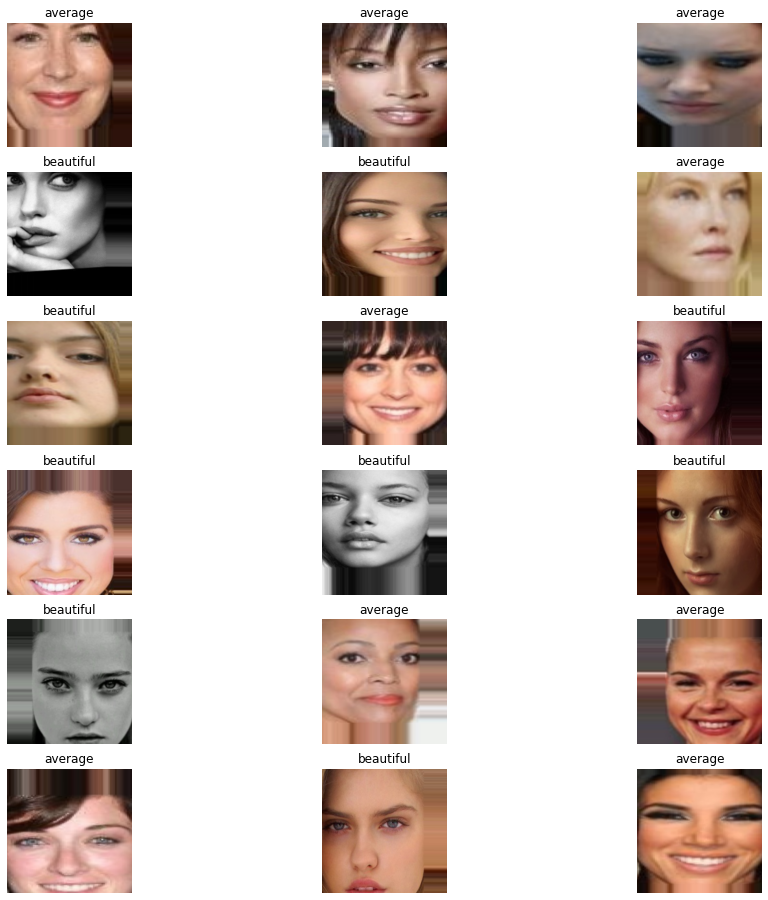

In [ ]:
# visualizing the train data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(labels[int(label[i])])
  plt.axis("off")

In [ ]:

model = tf.keras.Sequential([
                             layers.Conv2D(filters= 62, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 62, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 62, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Flatten(),


                             layers.Dense(128, activation= "relu"),
                             layers.Dropout(0.5),

                             layers.Dense(1, activation= "sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 62)      4712      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 62)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 62)      96162     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 62)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 49, 49, 62)        96162     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 62)      

In [ ]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:

model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = val_data,
          validation_steps = len(val_data)
          )

Epoch 1/10
125/125 [==============================] - 55s 434ms/step - loss: 0.6950 - accuracy: 0.5123 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 55s 442ms/step - loss: 0.6962 - accuracy: 0.5470 - val_loss: 0.6354 - val_accuracy: 0.7033
Epoch 3/10
125/125 [==============================] - 54s 430ms/step - loss: 0.5412 - accuracy: 0.7452 - val_loss: 0.4633 - val_accuracy: 0.7867
Epoch 4/10
125/125 [==============================] - 54s 429ms/step - loss: 0.4681 - accuracy: 0.7903 - val_loss: 0.4724 - val_accuracy: 0.7567
Epoch 5/10
125/125 [==============================] - 54s 434ms/step - loss: 0.4800 - accuracy: 0.7747 - val_loss: 0.4294 - val_accuracy: 0.8033
Epoch 6/10
125/125 [==============================] - 54s 429ms/step - loss: 0.4486 - accuracy: 0.7975 - val_loss: 0.4557 - val_accuracy: 0.7933
Epoch 7/10
125/125 [==============================] - 55s 441ms/step - loss: 0.4249 - accuracy: 0.8108 - val_loss: 0.4095 - val_ac

In [ ]:
model_evaluation = model.evaluate(test_data)

10/10 [==============================] - 1s 91ms/step - loss: 0.3131 - accuracy: 0.8733


In [ ]:
model.save('/beautyScaleCv5Ep10.h5')

In [ ]:
y_predicted = model.predict(test_data)
y_predicted = y_predicted.astype(int)

In [ ]:
y_true = test_data.classes.tolist()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_predicted)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[148   2]
 [146   4]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_true, y_predicted)*100,'%')
print('Precision Macro Score ',precision_score(y_true, y_predicted,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_true, y_predicted, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_true, y_predicted, average = 'macro')*100,'%')

Accuracy Score 50.66666666666667 %
Precision Macro Score  58.50340136054422 %
Recall_Score 50.66666666666667 %
F1_Score 35.8974358974359 %


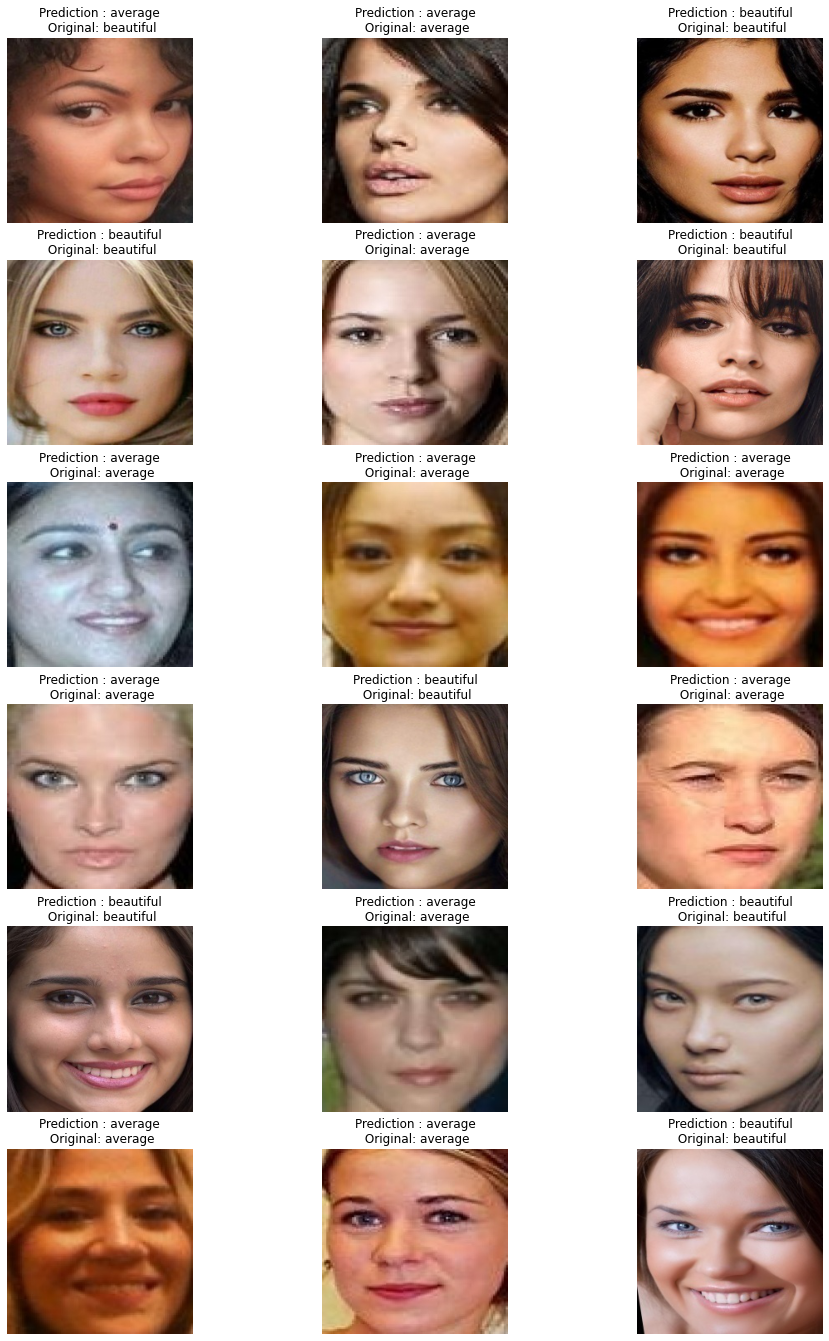

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):

  image, label = test_data.next()

  model_pred = model.predict(image) 

  plt.subplot(50,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction : {labels[int(tf.round(model_pred[i]))]}\n Original: {labels[int(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")
